## <center>Matplotlib - График 1    

In [5]:
import pandas as pd
# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv('Seasons_Stats.csv')


Сгруппируем игроков по возрасту и выведем на диаграме в процентном соотношении.
Круговая диаграмма используется для отображения процентных показателей частей по отношению к общему значению.

In [7]:
df['Age'].value_counts()

24.0    2794
23.0    2748
25.0    2518
26.0    2380
27.0    2149
22.0    1926
28.0    1823
29.0    1576
30.0    1433
31.0    1179
32.0     952
33.0     713
21.0     609
34.0     538
35.0     347
20.0     288
36.0     210
37.0     143
19.0     111
38.0      92
39.0      48
40.0      16
18.0      13
41.0       5
42.0       3
44.0       1
43.0       1
Name: Age, dtype: int64

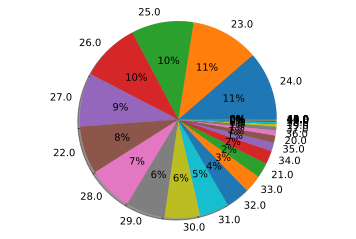

In [8]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = df['Age'].value_counts().index
sizes = df['Age'].value_counts().values
 
# Plot
plt.pie(sizes,  labels=labels, autopct='%1.f%%', shadow=True)
 
plt.axis('equal')
plt.show()

## <center> Seaborn - График 2

In [9]:
import seaborn as sns

In [10]:
df2 = pd.read_csv('tmdb_5000_movies.csv')
df2 = df2.dropna()

Посмотрим на распределение продолжительности фильмов `runtime`. Для этого построим `distplot`,
тещкуй тип графика предназначен для визуализации распределение величины

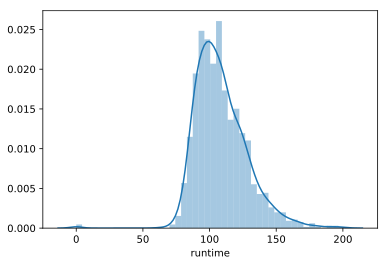

In [11]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df2.runtime);

## <center> Seaborn - График 3

Визуализируем, как связаны между собой популярность `popularity` фильма и бюджет `budget`
Для того чтобы посмотреть на взаимосвязь двух численных признаков, используем `joint_plotz` – гибрид `scatter plot` и `histogram`

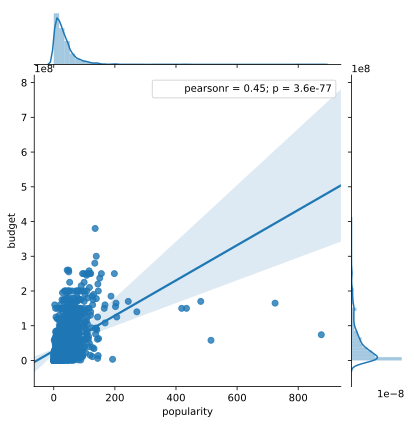

In [12]:
sns.jointplot(x='popularity', y='budget', 
              data=df2, kind='reg');

## <center> Plotly - График 4

In [13]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Построим `line plot` с динамикой стоимости `budget` и зароботка `revenue` фильмов по годам.
Для этого будем использовать интерактивные графики Plotly, которые позволяют посмотреть точное численное значение при наведении мыши.

In [14]:
df2['year'] = pd.to_datetime(df2["release_date"] ).dt.year

In [15]:
budget_years_df = df2.groupby('year')[['budget']].sum()

In [16]:
revenue_years_df = df2.groupby('year')[['revenue']].sum()

In [17]:
years_df = budget_years_df.join(revenue_years_df)
years_df.head()

,budget,revenue
year,,
1937,1488423,184925486
1939,2777000,33754967
1940,2280000,83320000
1942,858000,267447150
1962,950000,59600000


In [18]:
years_df.columns = ['Budgets', 'Revenues']
years_df.head()

,Budgets,Revenues
year,,
1937,1488423,184925486
1939,2777000,33754967
1940,2280000,83320000
1942,858000,267447150
1962,950000,59600000


In [19]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Budgets,
    name='Budgets'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Revenues,
    name='Revenues'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Budgets and Revenues'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

## <center>Plotly - График 5

По аналогиие с предыдущим примером визуализируем динамику стоимости `budget` и зароботка `revenue` фильмов по годам.
Только в текущем случаем воспользуемся типом графика `bar`, который отображает сравнение одной или нескольких метрик по категориям без определенного порядка.

In [20]:
trace0 = go.Bar(
    x=years_df.index,
    y=years_df.Budgets,
    name='Budgets',
    orientation = 'v'
)

trace1 = go.Bar(
    x=years_df.index,
    y=years_df.Revenues,
    name='Revenues',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Budgets and Revenues'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)